In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg 
import tkinter as tk 
# Define a square wave function 
def square_wave(t): 
    return np.where((t % (2 * np.pi)) < np.pi, 1, -1) 

In [2]:
# Define function to compute Fourier series 
def fourier_series(f, n_terms, T, t): 
    A0 = (1 / T) * np.trapz(f(t), t) 
    result = np.zeros_like(t) 
    result += A0 / 2 
    for n in range(1, n_terms + 1): 
        an = (2 / T) * np.trapz(f(t) * np.cos(2 * np.pi * n * t / T), t) 
        bn = (2 / T) * np.trapz(f(t) * np.sin(2 * np.pi * n * t / T), t) 
        result += an * np.cos(2 * np.pi * n * t / T) + bn * np.sin(2 * np.pi * n * t / T) 
    return result 

In [3]:
# Define function to plot the graphs 
def plot_fourier_series(f, n_terms, T): 
    t = np.linspace(-T, T, 1000) 
    f_approx = fourier_series(f, n_terms, T, t) 
    fig, ax = plt.subplots() 
    ax.plot(t, f(t), label='Original Function') 
    ax.plot(t, f_approx, label=f'Fourier Series (n={n_terms})') 
    ax.legend() 
    return fig 

In [4]:
# Define function to get user input and plot the graphs 
def on_button_click(): 
    n_terms = int(terms_entry.get()) 
    figure = plot_fourier_series(func, n_terms, period) 
    plot_canvas.figure = figure 
    plot_canvas.draw() 

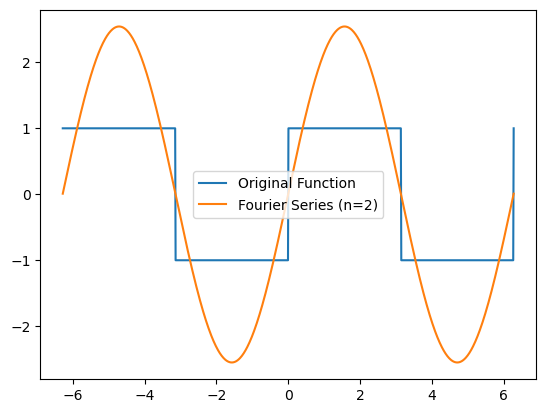

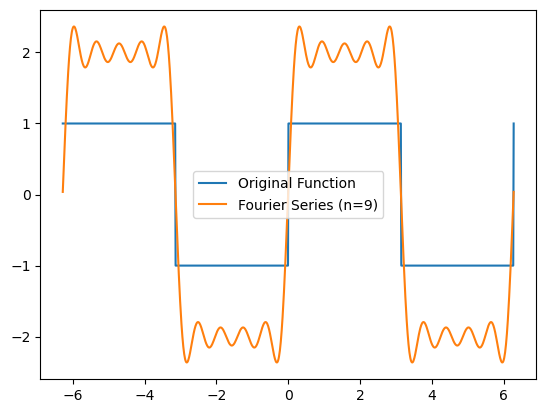

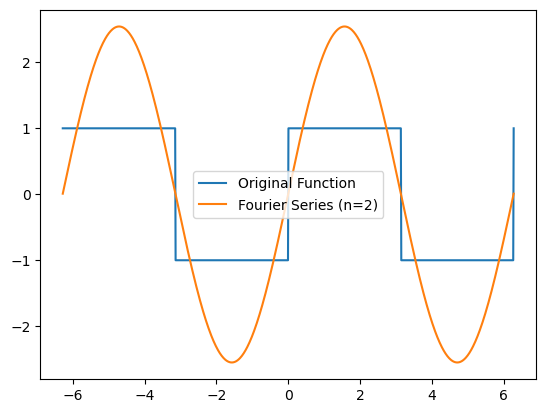

In [5]:
# Define your function and period here 
func = square_wave 
period = 2 * np.pi 
# Create the GUI 
window = tk.Tk() 
window.title("Fourier Series Visualizer") 
window.geometry("800x600") 
window.rowconfigure(1, weight=1) 
window.columnconfigure(0, weight=1) 
# Create terms input field 
terms_label = tk.Label(window, text="Number of terms:") 
terms_label.grid(row=0, column=0, sticky='e') 
terms_entry = tk.Entry(window) 
terms_entry.grid(row=0, column=1, sticky='w') 
# Create plot button 
button = tk.Button(window, text="Plot Fourier Series", command=on_button_click) 
button.grid(row=0, column=2) 
# Create initial plot 
figure = plot_fourier_series(func, 5, period) 
plot_canvas = FigureCanvasTkAgg(figure, window) 
plot_canvas.get_tk_widget().grid(row=1, column=0, columnspan=3, sticky='nsew') 
window.mainloop()